**Resources**

[h20 site](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/if.html#anomaly-score)

[Isolation trees example/tutorial](https://github.com/h2oai/h2o-tutorials/blob/master/tutorials/isolation-forest/interpreting_isolation-forest.ipynb)

##Import libraries and download data

####Install h20 and dependencies

In [ ]:
!pip install requests
!pip install tabulate
!pip install future

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 176.0 MB 5.5 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.2-py2.py3-none-any.whl size=176112127 sha256=ca85b1728c389ad392b4245420225f9996573f471847945239b9471ecbb0ce86
  Stored in directory: /root/.cache/pip/wheels/0b/83/bd/343a6140119b4098103e725e1cfe9f198568d13cf103acbc7c
Successfully built h2o


####Import h20 after installation

In [ ]:
import pandas as pd

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmptp9vbj9v
  JVM stdout: /tmp/tmptp9vbj9v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmptp9vbj9v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,"14 days, 12 hours and 41 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_2fe3s7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.estimators import H2OIsolationForestEstimator

####Download data

In [ ]:
#load IBM attrition data using h20
employee_data = h2o.import_file('/content/drive/MyDrive/Kaggle/IBM_Employee_Attrition.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#preview the column names to select those to be included in the analysis
employee_data.columns

['\ufeffAge',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
#rename the first column since it imported with extra characters
employee_data = employee_data.rename({'\ufeffAge': 'Age'})

In [ ]:
employee_data.head()

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
employee_data.shape

(1470, 35)

##Analysis

###Run Isolation Trees algorithm on the data

We will find the anamolous records by training the isolation tree algorithm on the dataset and reviewing the predictions. 

In [ ]:
#define the columns of data we will use in our analysis
x_var = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
         'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
         'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 
         'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
         'YearsSinceLastPromotion', 'YearsWithCurrManager']

#train the isolation trees model
isolation_model = H2OIsolationForestEstimator(model_id = 'isolation_forest.hex', seed = 1234)
isolation_model.train(training_frame = employee_data, x = x_var)

isolationforest Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [StandardHours, Over18]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████| (done) 100%
Model Details
H2OIsolationForestEstimator :  Isolation Forest
Model Key:  isolation_forest.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,51791.0,8.0,8.0,8.0,39.0,119.0,77.74




ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: 6.692547804328687
Normalized Anomaly Score: 0.18085423274783088

Scoring History: 


,,timestamp,duration,number_of_trees,mean_tree_path_length,mean_anomaly_score
0,,2022-02-09 08:53:22,0.071 sec,0.0,NaN,NaN
1,,2022-02-09 08:53:22,0.372 sec,1.0,6.642739,0.059543
2,,2022-02-09 08:53:22,0.432 sec,2.0,6.779289,0.055178
3,,2022-02-09 08:53:22,0.497 sec,3.0,6.758385,0.060404
4,,2022-02-09 08:53:22,0.564 sec,4.0,6.761856,0.079381
5,,2022-02-09 08:53:22,0.625 sec,5.0,6.765408,0.097747
6,,2022-02-09 08:53:22,0.679 sec,6.0,6.758299,0.090638
7,,2022-02-09 08:53:23,0.724 sec,7.0,6.755068,0.107158
8,,2022-02-09 08:53:23,0.817 sec,8.0,6.750539,0.124730
9,,2022-02-09 08:53:23,0.895 sec,9.0,6.736254,0.139630



See the whole table with table.as_data_frame()


In [ ]:
#see the predictions
predictions = isolation_model.predict(employee_data)
predictions.head()

isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


predict,mean_length
0.388235,6.34
0.0352941,6.94
0.141176,6.76
0.0470588,6.92
0.0941176,6.84
0,7
0.494118,6.16
0.117647,6.8
0.141176,6.76
0.0470588,6.92


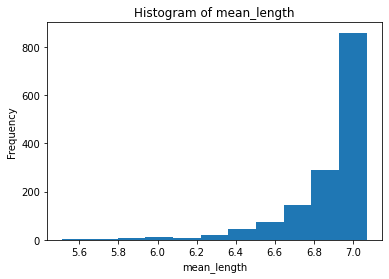

breaks,counts,mids_true,mids,widths
5.44167,nan,nan,nan,nan
5.58333,2,2.65,5.5125,0.141667
5.725,3,2.73,5.65417,0.141667
5.86667,9,2.8,5.79583,0.141667
6.00833,13,2.89,5.9375,0.141667
6.15,7,2.94,6.07917,0.141667
6.29167,22,3.01,6.22083,0.141667
6.43333,45,3.08,6.3625,0.141667
6.575,76,3.15,6.50417,0.141667
6.71667,144,3.22,6.64583,0.141667


In [ ]:
#plot a histogram of the mean_length scores to identify the cutoff for anomalies
predictions['mean_length'].hist()

###Define the anomalies

Let's see how many records have been identified as an anomaly.

In [ ]:
anomalies = employee_data[predictions['mean_length'] < 6.69]
print('Number of Anomalies: ' + str(anomalies.nrow))
print('Number of Anomalies as Percent of Total: ', str(anomalies.nrow/1470))

Number of Anomalies: 557
Number of Anomalies as Percent of Total:  0.37891156462585035


In [ ]:
# anomalies = employee_data[predictions["mean_length"] < 6.575]
# print("Number of Anomalies: " + str(anomalies.nrow))
# print('Number of Anomalies as Percent of Total: ', str(anomalies.nrow/1470))

In [ ]:
#create a dataframe of the records identified as an anomaly from the model
anomaly_records = isolation_model.predict(anomalies)['mean_length'].cbind(anomalies[x_var])
print(anomaly_records.shape)
anomaly_records.head()

isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%
(557, 32)


mean_length,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6.34,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
6.16,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
6.66,22,Non-Travel,1123,Research & Development,16,2,Medical,4,Male,96,4,1,4,Divorced,2935,7324,1,Y,Yes,13,3,2,80,2,1,2,2,1,0,0,0
6.6,24,Non-Travel,673,Research & Development,11,2,Other,1,Female,96,4,2,3,Divorced,4011,8232,0,Y,No,18,3,4,80,1,5,5,2,4,2,1,3
6.6,21,Travel_Rarely,391,Research & Development,15,2,Life Sciences,3,Male,96,3,1,4,Single,1232,19281,1,Y,No,14,3,4,80,0,0,6,3,0,0,0,0
6.62,53,Travel_Rarely,1282,Research & Development,5,3,Other,3,Female,58,3,5,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8
6.52,32,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,2,Female,72,1,1,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7
6.6,44,Travel_Rarely,477,Research & Development,7,4,Medical,1,Female,42,2,3,4,Married,10248,2094,3,Y,No,14,3,4,80,1,24,4,3,22,6,5,17
6.42,39,Travel_Rarely,895,Sales,5,3,Technical Degree,4,Male,56,3,2,4,Married,2086,3335,3,Y,No,14,3,3,80,1,19,6,4,1,0,0,0
6.54,27,Travel_Rarely,1240,Research & Development,2,4,Life Sciences,4,Female,33,3,1,1,Divorced,2341,19715,1,Y,No,13,3,4,80,1,1,6,3,1,0,0,0


###Divide the anomaly mean_length values into quartiles

In [ ]:
#convert anomaly_records to df to calculate quartiles
anomalies_df = h2o.as_list(anomaly_records)
anomalies_df.head()

,mean_length,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6.34,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,6.16,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
2,6.66,22,Non-Travel,1123,Research & Development,16,2,Medical,4,Male,96,4,1,4,Divorced,2935,7324,1,Y,Yes,13,3,2,80,2,1,2,2,1,0,0,0
3,6.60,24,Non-Travel,673,Research & Development,11,2,Other,1,Female,96,4,2,3,Divorced,4011,8232,0,Y,No,18,3,4,80,1,5,5,2,4,2,1,3
4,6.60,21,Travel_Rarely,391,Research & Development,15,2,Life Sciences,3,Male,96,3,1,4,Single,1232,19281,1,Y,No,14,3,4,80,0,0,6,3,0,0,0,0


In [ ]:
#create a column for quartiles
anomalies_df.insert(1, 'Quartile', '')

#calculate the quartile of each mean_length
anomalies_df['Quartile'] = pd.qcut(anomalies_df['mean_length'], q=4)

print("Quartile Values: ", anomalies_df['Quartile'].unique())
anomalies_df.head()

Quartile Values:  [(5.2989999999999995, 6.38], (6.62, 6.68], (6.54, 6.62], (6.38, 6.54]]
Categories (4, interval[float64, right]): [(5.2989999999999995, 6.38] < (6.38, 6.54] < (6.54, 6.62] <
                                           (6.62, 6.68]]


,mean_length,Quartile,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,6.34,"(5.2989999999999995, 6.38]",41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,6.16,"(5.2989999999999995, 6.38]",59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
2,6.66,"(6.62, 6.68]",22,Non-Travel,1123,Research & Development,16,2,Medical,4,Male,96,4,1,4,Divorced,2935,7324,1,Y,Yes,13,3,2,80,2,1,2,2,1,0,0,0
3,6.60,"(6.54, 6.62]",24,Non-Travel,673,Research & Development,11,2,Other,1,Female,96,4,2,3,Divorced,4011,8232,0,Y,No,18,3,4,80,1,5,5,2,4,2,1,3
4,6.60,"(6.54, 6.62]",21,Travel_Rarely,391,Research & Development,15,2,Life Sciences,3,Male,96,3,1,4,Single,1232,19281,1,Y,No,14,3,4,80,0,0,6,3,0,0,0,0


The quartiles are as follows: 


*   1st quartile = 5.2989999999999995 to 6.38
*   2nd quartile = 6.38 to 6.54
*   3rd quartile = 6.54 to 6.62
*   4th quartile = 6.62 to 6.68





In [ ]:
first = anomalies_df.loc[anomalies_df['mean_length'] < 6.38]
second = anomalies_df.loc[(anomalies_df['mean_length'] > 6.38) & (anomalies_df['mean_length'] < 6.54)]
third = anomalies_df.loc[(anomalies_df['mean_length'] > 6.54) & (anomalies_df['mean_length'] < 6.62)]
fourth = anomalies_df.loc[anomalies_df['mean_length'] > 6.62]

print('# of 1st quartile: ', first.shape)
print('# of 2nd quartile: ', second.shape)
print('# of 3rd quartile: ', third.shape)
print('# of 4th quartile: ', fourth.shape)

# of 1st quartile:  (138, 33)
# of 2nd quartile:  (111, 33)
# of 3rd quartile:  (97, 33)
# of 4th quartile:  (128, 33)


###Interpret the anomalies

####Global level

In [ ]:
global_surrogate_data = employee_data

#identify anomalies as those with a mean_length < 6.38, which is the cutoff of our first quartile
global_surrogate_data['anomaly'] = (predictions['mean_length'] < 6.38).ifelse('Yes', 'No')

global_surrogate_data['anomaly'].table()

anomaly,Count
No,1332
Yes,138


In [ ]:
from h2o.estimators import H2ORandomForestEstimator

global_surrogate_dt = H2ORandomForestEstimator(model_id = "global_surrogate_decision_tree.hex", 
                                               ntrees = 1, max_depth = 8,
                                               sample_rate = 1)
global_surrogate_dt.train(training_frame = global_surrogate_data, x = x_var, y = "anomaly")

drf Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [StandardHours, Over18]
  warnings.warn(mesg["message"], RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Sample rate is 100% and no validation dataset and no cross-validation. There are no out-of-bag data to compute error estimates on the training data!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  global_surrogate_decision_tree.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1.0,1.0,738.0,8.0,8.0,8.0,54.0,54.0,54.0




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: NaN
RMSE: NaN
LogLoss: NaN
Mean Per-Class Error: NaN
AUC: NaN
AUCPR: NaN
Gini: NaN

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-09 10:02:10,0.015 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,MonthlyIncome,19.440315,1.000000,0.242757
1,YearsAtCompany,14.517544,0.746775,0.181285
2,YearsSinceLastPromotion,10.429230,0.536474,0.130233
3,Department,5.102716,0.262481,0.063719
4,YearsInCurrentRole,4.095009,0.210645,0.051136
5,TrainingTimesLastYear,3.006016,0.154628,0.037537
6,DailyRate,2.937280,0.151092,0.036679
7,Age,2.791394,0.143588,0.034857
8,MonthlyRate,2.771015,0.142540,0.034603
9,JobLevel,2.095238,0.107778,0.026164



See the whole table with table.as_data_frame()


In [ ]:
import os
import subprocess
from IPython.display import Image
def generateTreeImage(decision_tree, image_file_path):
    # Download MOJO
    mojo_path = decision_tree.download_mojo(get_genmodel_jar=True)
    directory = os.path.dirname(mojo_path)
    h2o_jar_path = os.path.join(directory, "h2o-genmodel.jar")
    # Create Graphviz file
    gv_file_path = os.path.join(directory, "decision_tree.gv")
    gv_call = " ".join(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree 0 -i", mojo_path , "-o", gv_file_path])
    result = subprocess.call(gv_call, shell=True)
    result = subprocess.call(["ls", gv_file_path], shell = False)
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    
    return Image(image_file_path)

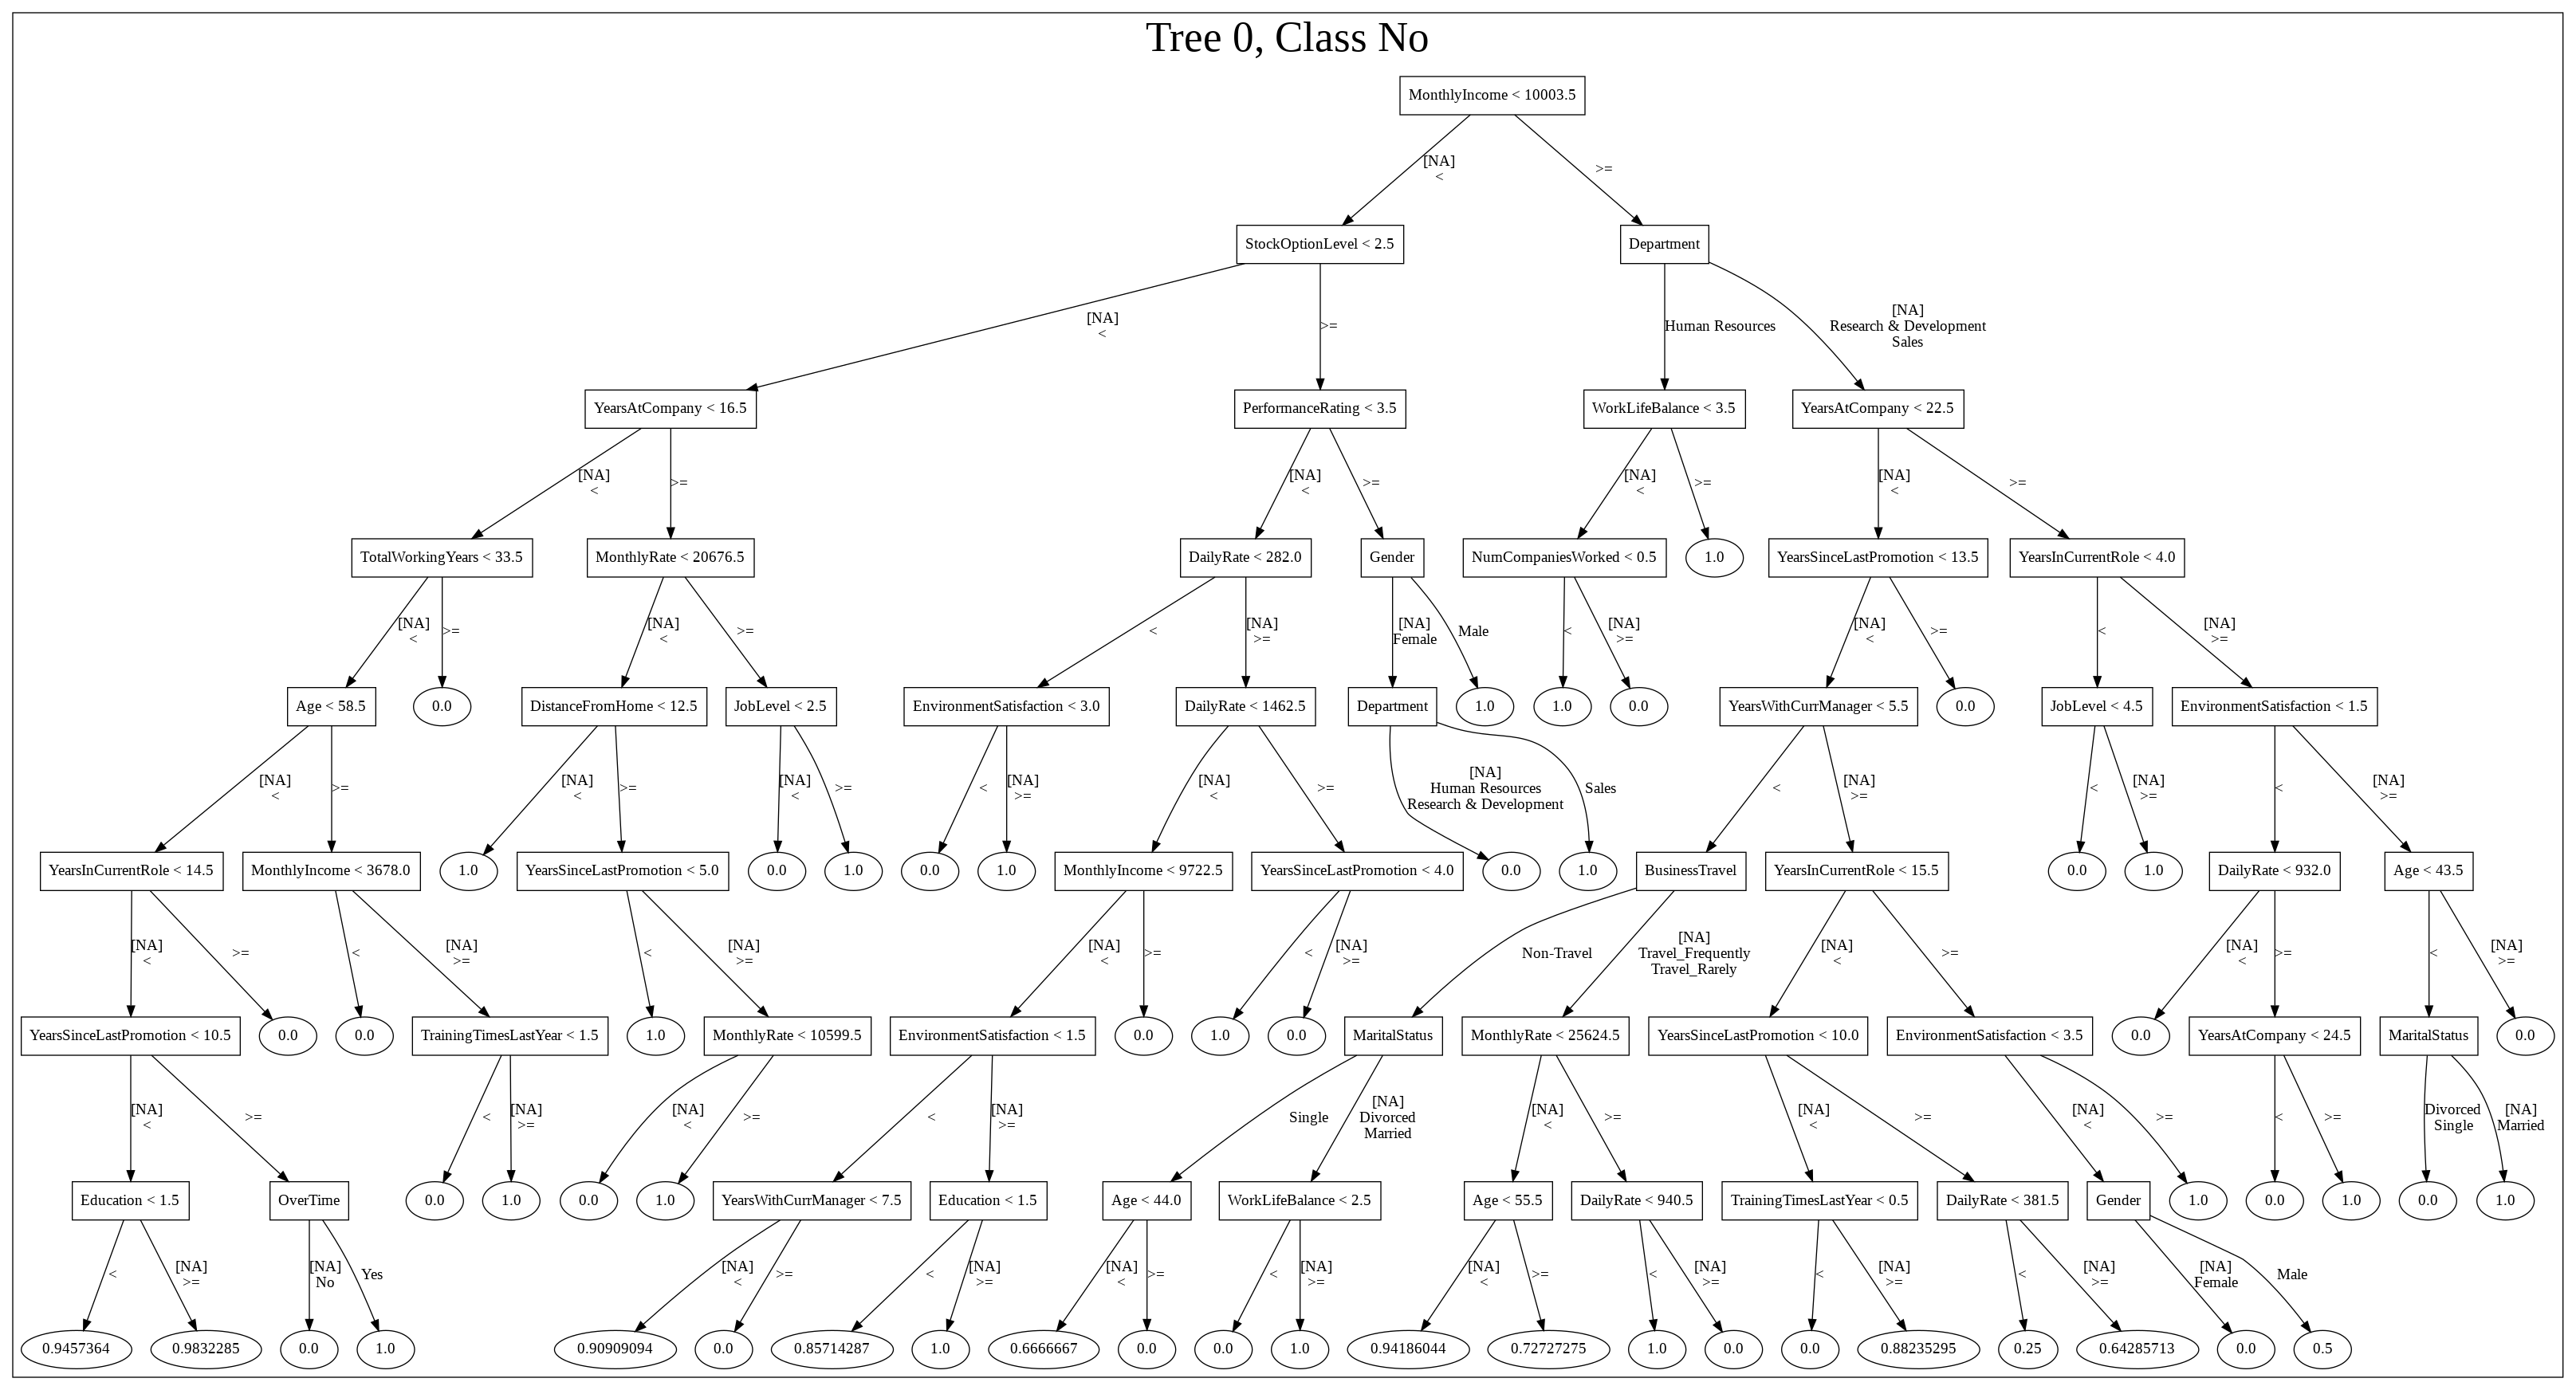

In [ ]:
generateTreeImage(global_surrogate_dt, "./global_surrogate_decision_tree.png")

The tree diagram visualizes the global surrogate decision tree. The values for the final leaf nodes represent the probability of the record not being an anomaly. In other words, it represents the likelihood the record is not an anomaly. Therefore, we want to draw our attention to the leaf nodes with low values as that indicates a segment of the data that is likely anomalous.


From the visualization, you can see that there are four leaf nodes with anomalies (leaf node = 0). One leaf node is defined as:

*   Years at Company < 17.5 
*   Total Working Years > 30.5
*   Total Working Years > 35.5
*   Monthly Rate < 23011.5

What this means is that someone who has been working more than 35.5 years and has a monthly rate below 23011.5 is not consistent with the data. Intuitively, it makes sense why this doesn't seem right. But, let's explore the data to confirm why that might be. 

In [ ]:
employee_data[['TotalWorkingYears', 'MonthlyRate']].cor()

TotalWorkingYears,MonthlyRate
1,0.0264425
0.0264425,1


By running a correlation on TotalWorkingYears and MonthlyRate, you can see that years and rate are positively correlated, meaning that as someone works more years, their rate increases. The correlation is weak, but it's an anomaly nonetheless.  

####Local level

In [ ]:
anomalies[0, x_var]

Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [ ]:
isolation_model.predict(anomalies[0, :])

isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


predict,mean_length
0.388235,6.34


In [ ]:
#find the first anomaly in the datframe
employee_data.head()

Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomaly
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,No
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No
32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6,No
59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0,Yes
30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,No
38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8,No
36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,No


In [ ]:
#copy employee data dataframe to analyize a single record previously identified as an anomaly
local_surrogate_data = employee_data[:, :]

#label the single record as an anamoly and all else as not
local_surrogate_data["anomaly_record"] = (local_surrogate_data["EmployeeNumber"] == 1).ifelse("Anomaly", "NotAnomaly")

In [ ]:
local_surrogate_data["anomaly_record"].table()

anomaly_record,Count
NotAnomaly,1469
Anomaly,1


In [ ]:
local_surrogate_dt = H2ORandomForestEstimator(model_id = "local_level_surrogate_decision_tree.hex", 
                                              ntrees = 1, max_depth = 3,
                                              sample_rate = 1)
local_surrogate_dt.train(training_frame = local_surrogate_data, x = x_var, y = "anomaly_record")

drf Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Dropping bad and constant columns: [StandardHours, Over18]
  warnings.warn(mesg["message"], RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: Sample rate is 100% and no validation dataset and no cross-validation. There are no out-of-bag data to compute error estimates on the training data!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  local_level_surrogate_decision_tree.hex


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1.0,1.0,109.0,3.0,3.0,3.0,4.0,4.0,4.0




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: NaN
RMSE: NaN
LogLoss: NaN
Mean Per-Class Error: NaN
AUC: NaN
AUCPR: NaN
Gini: NaN

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-09 10:03:14,0.026 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,MonthlyIncome,0.666667,1.000000,0.667121
1,WorkLifeBalance,0.314815,0.472222,0.315029
2,TrainingTimesLastYear,0.017838,0.026757,0.017850
3,Age,0.000000,0.000000,0.000000
4,BusinessTravel,0.000000,0.000000,0.000000
5,DailyRate,0.000000,0.000000,0.000000
6,Department,0.000000,0.000000,0.000000
7,DistanceFromHome,0.000000,0.000000,0.000000
8,Education,0.000000,0.000000,0.000000
9,EducationField,0.000000,0.000000,0.000000



See the whole table with table.as_data_frame()


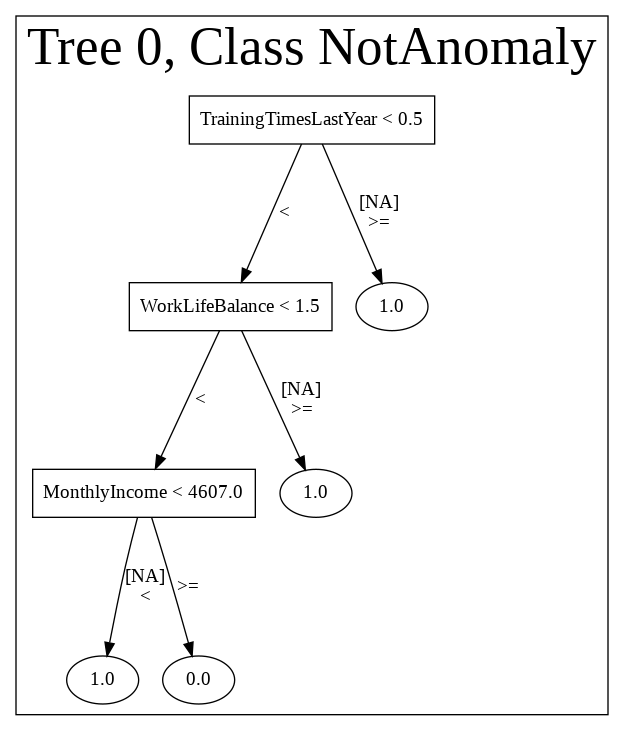

In [ ]:
generateTreeImage(local_surrogate_dt, "./global_surrogate_decision_tree.png")

##Other code from site, not Github

In [ ]:
score = isolation_model.predict(employee_data)
result_pred = score["predict"]

isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
result_pred

predict
0.388235
0.0352941
0.141176
0.0470588
0.0941176
0
0.494118
0.117647
0.141176
0.0470588


In [ ]:
ln_pred = isolation_model.predict_leaf_node_assignment(employee_data, "Path")
ln_pred.head()

T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44,T45,T46,T47,T48,T49,T50
LRRRRRLL,RLLRRLLL,LRLLLLRR,LLLLRLLR,RRLRRLRR,RRLL,LLLLRLRR,RRRLLL,RLRLL,LLLRLRLL,LLLRLRLL,RLRRLLLL,RLLRLLLR,LRRLRLRR,LRRLRLR,RRLR,LRLLLRLR,RRLRRLLL,RLLRLRR,LLRLRRL,RRLLRLLR,RLRLLLLL,RRRRL,RLLRLLLR,LRLLRR,LLLRLRRL,RLRLLLLL,RRLLLRLL,LLLRRLRR,LRLLRLRL,RRLLLLRL,LLLLLL,RRRLLLL,RLLLLLLL,LRLRLRRL,LLRLRRRL,LLRRLLLR,RRLLLLLL,LLRLLRL,LRLLRLRL,RLLLRRLL,RLLLRLLL,LLRRRLR,LRLRLLRR,LRLLLLR,RLLLLRRR,RLRLL,LLLRRRLL,LLRLLRLR,RLLRL
LLLRLLLR,RRLRRRLR,LLLLRLLR,RRRLLLLL,RRLRRRRL,LRRLR,LRRLLRLR,LLLRLLRL,RRLLLLLR,LLLRLLLR,LLLLLRRR,RLRRLLLL,RLRRLRRR,LRRRRRLL,RLRLLLRR,LRRLLRRR,LLRLLLRL,RRLLRRLR,LLLLLLRR,LRRLLLRL,RRRLRLLL,LRRLRRLR,LLLLLLRR,RLLRRRRR,LLLLRLLR,LLRLLRRR,LLRLLLLL,RLLLLLLL,LLLRRRLL,LRLLRLRL,RRLLLLRL,RLLLLRRL,LLLLLRLL,LLRLLLRR,LLRLLRLR,LLRRRLRL,RLRRRRLL,RLRLLLLL,RLRRRLRR,LRLLRLLL,LLRRRLLL,RRLRRLLL,LLLRLRLL,LRRRLLLR,RRLLRLRR,RLLRRLRR,RLLRLLRL,LRRRRLLL,RRRLLLLR,RRLLRRRR
LLLLLLRR,RLLRRLLR,LLRLLLL,LLLRLLRR,LLLLRRLR,RRRLRLRL,LLLLRLRR,LLRLLLLR,RRLLLRLR,LLLRLRLL,LLLLLRRL,RLLRLRR,RLRRLLLR,LRRLRLRR,RLRLLLRR,LLRRLRLL,LRLLLRLR,RLLRRLLL,LLRRRLLL,LLLRLLRR,LLRRLLLR,LRRLLLRR,LLLLLLLL,RRRRLLLL,LRLRLRLL,LRRRLRL,RLLLLRRL,LLLRLRRR,LLLLLRRL,LRLLRLRL,RLLLLLLL,LLLLLRLL,RLRLR,LLRLRLLL,LRLRRLLL,LLRRRLLR,LLLLL,LLLRLLR,RLRRLLLL,LRLLRLRR,RLLRLLRR,LRRRLR,LLRRLLLL,LRRRLLLR,RRLRLLLR,RLRLRLRR,RLRRLRRL,LLLLLRLL,RLRLRRLL,RRLLLLRR
LLLRLLRL,RRLRRLLL,LRLLLRLL,RRRLRRLR,RRLRLRLR,RRRRLLRL,LLLLRLRR,LLLRLLLR,RRLLLLLL,LLRRLRRL,LLLRLLLR,RLRRLRLR,RLRRLLLL,LRRLRRLL,LRLLLL,LLRRLRLR,LLRLLLRL,RLLRRRRR,LLRLLLLR,LLRLRLLR,RRLLRLRR,RLRLLRRL,LLLLLRRL,RRRRLRLL,LLLLRRLR,LLRLLLLR,RLRLLLLL,LLLRLRLL,LLLRRRLL,RLLLRLLL,RRLLLLRR,LLLRRRLL,RLRRRLRR,LLLRRRL,LLRLLRR,LLRLRLRR,LLLRLLLL,RLRLLLLL,RLRRLLLL,LRLLRLRL,LLLLLLRR,RLRLLLLL,LLLRLRLL,LRLLLRRR,RRLLLLRL,RLRLLRLR,RLLRLRLL,LLLLRLRL,RLRLRRLL,RRLLRRRL
LLLRLLLL,RLLRLLRL,LLRRLR,LLLLRLLR,RLLRRLLL,LRLLLRRL,LRRLLRLR,LLRLLLLL,RLLRLLLR,LLLLLLLL,LLLRLLLL,RLRRLLLL,RLRRLLLL,LRLLRRLL,RLRLLLLR,LLRRLLLL,LRLLLRLL,RLLRLLRL,LLRLLLLR,LLLLRLRL,RRLRLLLL,RLRLRRLR,RRLRLR,RLLRLLLR,LLRLRLRR,LLLLRRRR,LLRRLL,LLLLLLRR,LLLRRRRL,LRLLRLLR,RRLLLLRL,RLLRLLR,LLRRLRLL,LLLLRLRR,LRLLLLLL,LLRLLRLL,LLLRRLLR,RRLLRLL,RLRRLRLL,LLLLLLLL,RLLRLLRR,RLLLLRRL,LLLRLLRL,LLLRRRLL,RLRRLLLR,RLLLLLLL,RLLRLLLL,LLLLLLLL,RLRLRRLL,RRLLRRLL
LRLLLLRR,RLLRRLRL,LLRRLLLR,RRRLLLLL,RRLRLRLR,RRRRLLRL,LLLLRLRR,LLLLLRRL,RRRRRRRL,LLLRRRRR,LLLRLRLR,RLRRLLLL,RLLLRLLL,LRRLRLRL,RLRLLLRR,LLRRLRLR,LLRLLLRL,RLLRLLLL,LLRLLLLR,LRRRLLLL,LRLRLRLR,RLRLLRRL,LLLLLLLL,RRRRLRLL,LRLRLLLL,LLRLLLLR,RLRLLLLL,LLLRLLLL,LLLRRRLL,LRLLRLLR,RLLLRRRL,LLLRRRRL,LLLLLLLR,RLLRRLLR,LLRLLRLL,LLRRRLRR,LLLRRLLR,RLLLRLLR,RLRRLLLL,LRLLRLLL,LLLLRRRL,RLLLRLLR,LLRRRRRL,LRRRLRRL,RRLLLLRL,RLLRRLLR,RLRRLRLL,LLLLLLLL,RLRLRRLL,RRLRLLLR
LLLLRLR,RRLRLRLL,LRRRLR,LLLRLLRR,LLRLRRLL,RRRLRLRL,LRRLLLRL,LLRLLLLL,RRLLLLLL,LLLRLRLL,LLLRLRLL,RLRRLLLL,RLRRLLLR,LRRLRLLR,RRL,LRLRLLR,LLRLLLRL,LRRRLRR,LLRLLLLL,LLLRLRR,LLRRLLLL,RLRRLR,LLLRLRLL,RLLRRLLL,LLRLRLRL,RRRR,RLLLLLLR,LLLRLLRL,LLRRLRR,RLRLLRR,RLLLLLLL,RLLRRRRL,RLRRRLRL,LRLLL,LRRR,LLRRRLLR,RLRRLLLL,RLLLRLLR,LLLLLRLR,LRLLRLRR,RLR,LRLLLL,LLLLLRLR,LRLRLR,RRRLLLRR,RLRLRLRR,RLLLRRRL,LLRL,LRLRL,RLRRRLLR
LLLLRR,RRLRLRRL,LLRRLLLL,LLLRRLRR,LLRLRLL,LRRRLRR,LRRRRLRL,LLLRLLLR,RRLLRLLL,LLLRLLLR,LLLRLRLR,RLRRLLLL,RLLLRRLR,LLLRLRLL,RLRLLLRR,LRLLRLLR,LLRLLLRL,RLLRLLLR,LLRLLLLL,LLLRLLRR,RRLRLLLL,RLLRLLLL,LLLLLLLR,RRRRLLLR,LLLLRLLL,LLLLRRRL,LLRLRLL,LRRLLL,LLLRRRRR,LRLLRLLR,RLLRRLLR,RLRLLLLL,LLLLLLLR,LLRLRLRL,LRLRRRR,LLRRRLLL,RLRRLRRR,RLLRRLLL,RLRRRLRR,LRLLLRRR,LLRRLLLL,LLLRRR,LLLLLRLR,LRRRLRLL,RRLLRLRL,RLRLLLRL,RLLRLRLR,LLLLLLLL,RRLLLRLL,RRLLRLLR
LLLRLLLR,RRLRLLLL,LLLLRLLR,RRLLLRLL,RRLRRRRR,RLLRLLRL,LLLLRLRR,LLLLLRRL,RRLLRLLL,LLLRLLLR,LLLLLRRR,RLRRLLLL,RLLLRLLL,RLLRR,RLRLLRLR,LRLLRLRR,LLRLLLRR,RRLLRRLR,LLLLLLRR,LRRRLLLL,LRLRRLR,LRRRLR,LLLLLLRR,RRRRLLLL,LRRRLRL,LLRLLLRL,RLRLLLLL,RLLLRRRL,LLLLLRRR,RLRRLLLL,RLLRLLLR,LLLLRRLL,LLLLLLLR,LLLLRLLL,RLLLRRRL,LLRRRLRL,RLRR